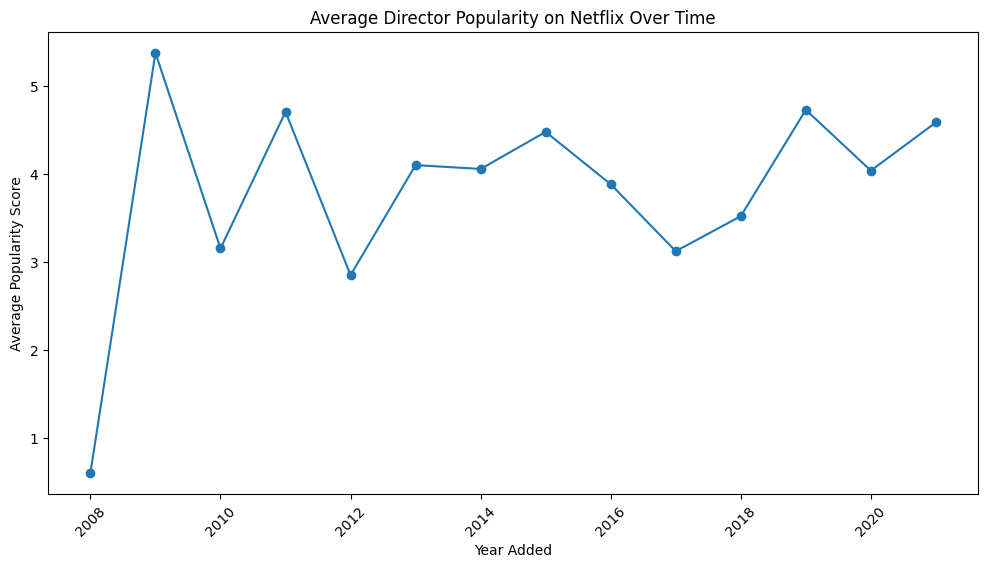

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Convert 'date_added' to datetime and extract the year
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Handling missing data
df['year_added'].fillna(df['release_year'], inplace=True)

# Load the popularity scores JSON
with open('../data/popularity.json', 'r') as file:
    popularity_scores = json.load(file)

# Add a column for director popularity
df['director_popularity'] = df['director'].map(lambda x: popularity_scores.get(x))

# Filter out rows with missing director popularity
df_directors = df.dropna(subset=['director_popularity'])

# Group by year and average the popularity scores
director_popularity_by_year = df_directors.groupby('year_added')['director_popularity'].mean()

# Plotting
plt.figure(figsize=(12, 6))
director_popularity_by_year.plot(kind='line', marker='o')
plt.title('Average Director Popularity on Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.show()
